<a href="https://colab.research.google.com/github/csoren66/Deep-Learning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>Transfer learning in image classification</h2>

In [11]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Make predictions using ready made model (without any training)**

In [12]:
IMAGE_SHAPE = (224,224)

classifier = tf.keras.Sequential([
         hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))                        
])

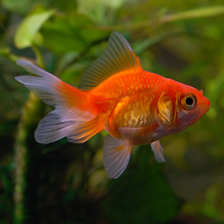

In [13]:


gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [14]:
gold_fish = np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [53]:
gold_fish[np.newaxis, ...]

array([[[[1.10726644e-03, 1.30718954e-03, 2.76816609e-04],
         [1.23029604e-03, 1.46097655e-03, 3.53710111e-04],
         [1.36870434e-03, 1.64552095e-03, 4.61361015e-04],
         ...,
         [1.29181084e-03, 1.53787005e-03, 1.53787005e-05],
         [1.26105344e-03, 1.50711265e-03, 1.53787005e-05],
         [1.21491734e-03, 1.44559785e-03, 0.00000000e+00]],

        [[1.12264514e-03, 1.30718954e-03, 3.22952710e-04],
         [1.27643214e-03, 1.49173395e-03, 4.30603614e-04],
         [1.38408304e-03, 1.66089965e-03, 5.07497116e-04],
         ...,
         [1.26105344e-03, 1.49173395e-03, 1.53787005e-05],
         [1.23029604e-03, 1.46097655e-03, 1.53787005e-05],
         [1.18415994e-03, 1.41484045e-03, 0.00000000e+00]],

        [[1.12264514e-03, 1.30718954e-03, 3.38331411e-04],
         [1.23029604e-03, 1.44559785e-03, 3.99846213e-04],
         [1.35332564e-03, 1.63014225e-03, 5.07497116e-04],
         ...,
         [1.24567474e-03, 1.47635525e-03, 1.53787005e-05],
         [

In [54]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [55]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [56]:
result

array([[-0.18098192, -0.4239775 ,  0.8203436 , ..., -0.8990128 ,
        -1.0580392 ,  1.3027447 ]], dtype=float32)

In [18]:
predicted_label_index = np.argmax(result)
predicted_label_index


2

In [57]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [59]:
image_labels[predicted_label_index]

'goldfish'

<h3 style='color:purple'>Load flowers dataset</h3>

In [60]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [61]:
data_dir

'./datasets/flower_photos'

In [62]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [63]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 PosixPath('datasets/flower_photos/daisy/4117918318_3c8935289b_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/695778683_890c46ebac.jpg'),
 PosixPath('datasets/flower_photos/daisy/3939135368_0af5c4982a_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/8759177308_951790e00d_m.jpg')]

In [64]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [26]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16229215579_e7dd808e9c.jpg'),
 PosixPath('datasets/flower_photos/roses/19271410704_932d1f2c97_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9164924345_6b63637acf.jpg'),
 PosixPath('datasets/flower_photos/roses/2568105249_15720d081f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17077876795_6dd1b03f54_m.jpg')]

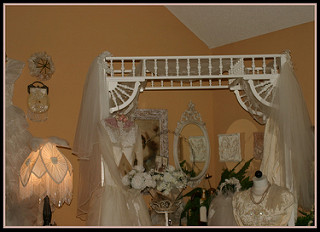

In [66]:
Image.open(str(roses[3]))

In [67]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/8555123165_2fe57eff4f.jpg'),
 PosixPath('datasets/flower_photos/tulips/9444202147_405290415b_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/5698944116_fd35fe6bea.jpg'),
 PosixPath('datasets/flower_photos/tulips/8712270665_57b5bda0a2_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/16283125269_4cfae953f1.jpg')]

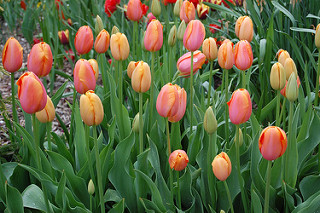

In [70]:
Image.open(str(tulips[3]))

Read flowers images from disk into numpy array using opencv

In [71]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [72]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [73]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/16229215579_e7dd808e9c.jpg'),
 PosixPath('datasets/flower_photos/roses/19271410704_932d1f2c97_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9164924345_6b63637acf.jpg'),
 PosixPath('datasets/flower_photos/roses/2568105249_15720d081f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17077876795_6dd1b03f54_m.jpg')]

In [74]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/16229215579_e7dd808e9c.jpg'

In [75]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [76]:
img.shape

(333, 500, 3)

In [77]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [78]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [79]:
X = np.array(X)
y = np.array(y)

Train test split

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Preprocessing: scale images

In [82]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Make prediction using pre-trained model on new flowers dataset

In [83]:
X[0].shape

(224, 224, 3)

In [84]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [85]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

In [39]:
gold_fish = np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

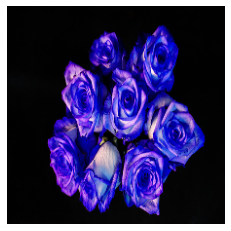

In [86]:
plt.axis('off')
plt.imshow(X[0])

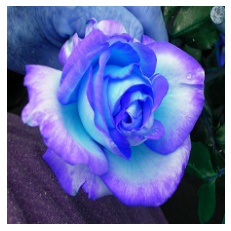

In [87]:
plt.axis('off')
plt.imshow(X[1])

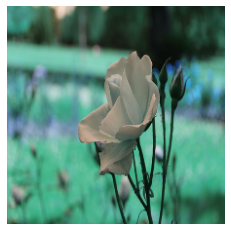

In [88]:
plt.axis('off')
plt.imshow(X[2])

In [89]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([722, 795, 795])

In [90]:
image_labels[795]

'shower curtain'

Now take pre-trained model and retrain it using flowers images

In [91]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [92]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [93]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 73s 797ms/step - loss: 0.7926 - acc: 0.7017
Epoch 2/5
86/86 [==============================] - 69s 803ms/step - loss: 0.4009 - acc: 0.8594
Epoch 3/5
86/86 [==============================] - 68s 789ms/step - loss: 0.3161 - acc: 0.8935
Epoch 4/5
86/86 [==============================] - 68s 789ms/step - loss: 0.2611 - acc: 0.9201
Epoch 5/5
86/86 [==============================] - 68s 787ms/step - loss: 0.2224 - acc: 0.9339


In [94]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 25s 779ms/step - loss: 0.3915 - acc: 0.8595


[0.3914657533168793, 0.8594771027565002]